#### Aluno: Vinícius Santos Monteiro

#### Nº USP: 11932463


## Desafio: Mapeamento de Teses e Dissertações em Temas Estratégicos da UF

O objetivo é **mapear** cada produção acadêmica (tese/dissertação) para **temas estratégicos predefinidos** do seu estado (UF).

**Observações**:
- Uma mesma produção pode estar associada a **mais de um tema** dentro da mesma UF.
- O mapeamento deve considerar **níveis de aderência**: **BAIXA**, **MÉDIA** e **ALTA**.
- A **justificativa do mapeamento** é **relevante** (explica a decisão) e **bem-vinda**, mas **não é obrigatória**.



## Leitura dos Arquivos Parquet

Abaixo, o código para carregar os dois arquivos:
- `leandl_oesnpg_dicionario.parquet` (dicionário de dados);
- `leandl_oesnpg_dados.parquet` (dados principais).


In [ ]:
!pip install codecarbon # reiniciar apos instalar este pacote se você estiver em um notebook

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
#baixando os arquivos (instalar o pacote gdown)
!gdown 12H957uf6mK-1X_ztT9hgFS1slpN2j-Wh
!gdown 1-QXkqH8HzLcV2JCA4Nm9G5rQhorYKJVe

# Ajuste os caminhos se necessário
path_dict = "leandl_oesnpg_dicionario.parquet"
path_data = "leandl_oesnpg_dados.parquet"

Downloading...
From: https://drive.google.com/uc?id=12H957uf6mK-1X_ztT9hgFS1slpN2j-Wh
To: /content/leandl_oesnpg_dicionario.parquet
100% 4.24k/4.24k [00:00<00:00, 13.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-QXkqH8HzLcV2JCA4Nm9G5rQhorYKJVe
From (redirected): https://drive.google.com/uc?id=1-QXkqH8HzLcV2JCA4Nm9G5rQhorYKJVe&confirm=t&uuid=f3e881b1-e6b0-44ba-9df6-e11a86e544a7
To: /content/leandl_oesnpg_dados.parquet
100% 123M/123M [00:01<00:00, 113MB/s]


In [ ]:
# Leitura usando pandas (requer pyarrow ou fastparquet)
dicionario_df = pd.read_parquet(path_dict)
dados_df = pd.read_parquet(path_data)

pd.set_option("display.max_columns", None)

print("Dimensões do dicionário:", dicionario_df.shape)
print("Dimensões dos dados:", dados_df.shape)

Dimensões do dicionário: (25, 2)
Dimensões dos dados: (42046, 25)


In [ ]:
print(f"\n * Valores nulos em 'modelo_nivel': {dados_df['modelo_nivel'].isnull().sum()}")
dados_df.dropna(subset=['modelo_nivel'], inplace=True)
print(f"\n * Valores nulos em 'modelo_nivel': {dados_df['modelo_nivel'].isnull().sum()}")


 * Valores nulos em 'modelo_nivel': 20

 * Valores nulos em 'modelo_nivel': 0


In [ ]:
dicionario_df

,campo,descricao
0,hash_id,Identificador único (hash) para a produção aca...
1,tema_id,Identificador numérico único do tema estratégico.
2,tema,Nome do tema estratégico definido por uma Unid...
3,palavras_chave,Lista de palavras-chave associadas ao tema est...
4,uf_tema_info,Unidade da Federação (UF) responsável pela def...
5,uf_pesquisador,Unidade da Federação (UF) da instituição de ví...
6,nome_programa,Nome do programa de pós-graduação ao qual a pr...
7,sigla_entidade_ensino,Sigla oficial da instituição de ensino respons...
8,nome_producao,Título completo da tese ou dissertação.
9,nome_subtipo_producao,"Tipo de produção acadêmica, como tese (doutora..."


In [ ]:
dados_df.head()

,hash_id,tema_id,tema,palavras_chave,uf_tema_info,uf_pesquisador,nome_programa,sigla_entidade_ensino,nome_producao,nome_subtipo_producao,nome_area_concentracao,nome_linha_pesquisa,nome_projeto,descricao_palavra_chave,descricao_resumo,descricao_abstract,descricao_keyword,data_titulacao,nome_grau_academico,nome_grande_area_conhecimento,nome_area_conhecimento,nome_subarea_conhecimento,nome_especialidade,modelo_nivel,modelo_explicacao
0,ce4025a58d1cff3d346e96af2e8f2d0185caeaddd78c1b...,1,Agronegócio e Tecnologias de Informação e Comu...,"[agroindústria, assistência técnica e extensão...",ACRE,ACRE,ENSINO DE CIÊNCIAS E MATEMÁTICA,UFAC,AS TECNOLOGIAS DIGITAIS DA INFORMAÇÃO E COMUNI...,DISSERTAÇÃO,ENSINO DE CIÊNCIAS E MATEMÁTICA,ENSINO E APRENDIZAGEM EM CIÊNCIAS E MATEMÁTICA,NÃO INFORMADO,TECNOLOGIAS DA INFORMAÇÃO E COMUNICAÇÃO;BASE N...,"A PESQUISA, DESCRITA NO PRESENTE TRABALHO, ENV...","THE RESEARCH, DESCRIBED IN THE PRESENT WORK, I...",INFORMATION AND COMMUNICATION TECHNOLOGIES;COM...,2023-10-18 00:00:00,MESTRADO PROFISSIONAL,MULTIDISCIPLINAR,ENSINO,ENSINO DE CIÊNCIAS E MATEMÁTICA,NÃO SE APLICA,BAIXA,A afinidade entre os dados do pesquisador e o ...
1,55982d77d62446fb9f76ae636c99c36d77d5e233ce4863...,1,Agronegócio e Tecnologias de Informação e Comu...,"[agroindústria, assistência técnica e extensão...",ACRE,ACRE,EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA,IFAC,O CURRÍCULO INTEGRADO DO INSTITUTO FEDERAL DO ...,DISSERTAÇÃO,EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA - EPT,PRÁTICAS EDUCATIVAS EM EDUCAÇÃO PROFISSIONAL E...,PRÁTICAS EDUCATIVAS EM EDUCAÇÃO PROFISSIONAL E...,ENSINO MÉDIO INTEGRADO;ORGANIZAÇÃO CURRICULAR;...,ESTE ESTUDO INVESTIGOU O CURRÍCULO DO ENSINO M...,THIS STUDY INVESTIGATED THE CURRICULUM OF INTE...,INTEGRATED SECONDARY EDUCATIO;CURRICULAR ORGAN...,2023-09-29 00:00:00,MESTRADO PROFISSIONAL,MULTIDISCIPLINAR,ENSINO,NÃO SE APLICA,NÃO SE APLICA,MEDIA,A afinidade entre os dados do pesquisador e o ...
2,1f7615b9be49f80d289ba7c99eb64a5f8dc387a23518a6...,3,Biodiversidade e Biotecnologia,"[biodiversidade, bioeconomia, biotecnologia, c...",ACRE,ACRE,CIÊNCIAS DA SAÚDE NA AMAZÔNIA OCIDENTAL,UFAC,TENDÊNCIA TEMPORAL E DISTRIBUIÇÃO ESPACIAL DAS...,DISSERTAÇÃO,DOENÇAS NÃO TRANSMISSÍVEIS E INFECTO-PARASITARIAS,"ESTUDO DAS DOENÇAS INFECTO PARASITÁRIAS, DA RE...",LEISHACRE: ESTUDO ECOEPIDEMIOLÓGICOS SOBRE LEI...,EPIDEMIOLOGIA;LEISHMANIA;PRAIS-WINSTEN,"INTRODUÇÃO. AS ANÁLISES NOS BIOMAS: AMAZÔNIA, ...","THE ANALYZES IN THE BIOMES: AMAZON, CAATINGA, ...",EPIDEMIOLOGY;LEISHMANIA;PRAIS-WINSTEN,2023-03-21 00:00:00,MESTRADO,CIÊNCIAS DA SAÚDE,MEDICINA,ANATOMIA PATOLÓGICA E PATOLOGIA CLÍNICA,NÃO SE APLICA,BAIXA,Os dados do pesquisador(a) estão focados na an...
3,3773fcb7084d294753146c9580750eca9b2348b78cc4aa...,3,Biodiversidade e Biotecnologia,"[biodiversidade, bioeconomia, biotecnologia, c...",ACRE,ACRE,GEOGRAFIA,UFAC,MODELAGEM DE BIOMASSA FLORESTAL E CÁLCULO DE C...,DISSERTAÇÃO,PRODUÇÃO DO ESPAÇO E AMBIENTE NAS FRONTEIRAS D...,ANALISE DA DINÂMICA SOCIOAMBIENTAL,ESTIMATIVAS DE BIOMASSA ACIMA DO SOLO EM ÁREA ...,GED;SENSORIAMENTO REMOTO;FLORESTA;MAPEAMENTO;B...,DURANTE AS ÚLTIMAS DÉCADAS AS FLORESTAS TROPIC...,DURING THE LAST FEW DECADES TROPICAL FORESTS H...,GEDI;REMOTE SENSING;FOREST;MAPPING;BIOMASS;CARBON,2023-08-25 00:00:00,MESTRADO,CIÊNCIAS HUMANAS,GEOGRAFIA,NÃO SE APLICA,NÃO SE APLICA,MEDIA,"A dissertação do pesquisador foca na ""modelage..."
4,07dae75eae08bbf1828e779c70c9d283965fe58880d02f...,3,Biodiversidade e Biotecnologia,"[biodiversidade, bioeconomia, biotecnologia, c...",ACRE,ACRE,CIÊNCIAS AMBIENTAIS,UFAC,ANÁLISE SOCIOECONÔMICA E AMBIENTAL DA CADEIA P...,DISSERTAÇÃO,CIÊNCIAS AMBIENTAIS,"SOCIEDADE, SEU AMBIENTE E USO SUSTENTADO",NÃO INFORMADO,BURITI;PRODUTO FLORESTAL NÃO-MADEIEREIRO;COOPE...,O BIOMA AMAZÔNICO OCUPA POSIÇÃO DE DESTAQUE NO...,THE AMAZON BIOME HOLDS A PROMINENT POSITION IN...,BURITI;NON-TIMBER FOREST PRODUCTS;COOPERATIVIS...,2023-01-30 00:00:00,MESTRADO,MULTIDISCIPLINAR,CIÊNCIAS AMBIENTAIS,NÃO SE APLICA,NÃO SE APLICA,ALTA,Os dados 

In [ ]:
frequencias = dados_df["nome_area_conhecimento"].value_counts()
print(frequencias)

nome_area_conhecimento
EDUCAÇÃO                       7263
INTERDISCIPLINAR               4859
ADMINISTRAÇÃO                  3776
ENSINO                         3706
CIÊNCIAS AMBIENTAIS            2338
                               ... 
IMUNOLOGIA                        6
MORFOLOGIA                        6
ENGENHARIA DE MINAS               4
PROBABILIDADE E ESTATÍSTICA       3
BIOFÍSICA                         2
Name: count, Length: 79, dtype: int64


In [ ]:
frequencias = dados_df["nome_grande_area_conhecimento"].value_counts()
print(frequencias)

nome_grande_area_conhecimento
MULTIDISCIPLINAR               11347
CIÊNCIAS HUMANAS               10600
CIÊNCIAS SOCIAIS APLICADAS      9480
CIÊNCIAS DA SAÚDE               2561
CIÊNCIAS AGRÁRIAS               2534
ENGENHARIAS                     2303
LINGÜÍSTICA, LETRAS E ARTES     1099
CIÊNCIAS EXATAS E DA TERRA      1081
CIÊNCIAS BIOLÓGICAS             1021
Name: count, dtype: int64


In [ ]:
# Contagem de cada categoria
print(dados_df["modelo_nivel"].value_counts())

# Porcentagem de cada categoria
print(dados_df["modelo_nivel"].value_counts(normalize=True) * 100)


modelo_nivel
BAIXA    20183
MEDIA    12950
ALTA      8893
Name: count, dtype: int64
modelo_nivel
BAIXA    48.025032
MEDIA    30.814258
ALTA     21.160710
Name: proportion, dtype: float64


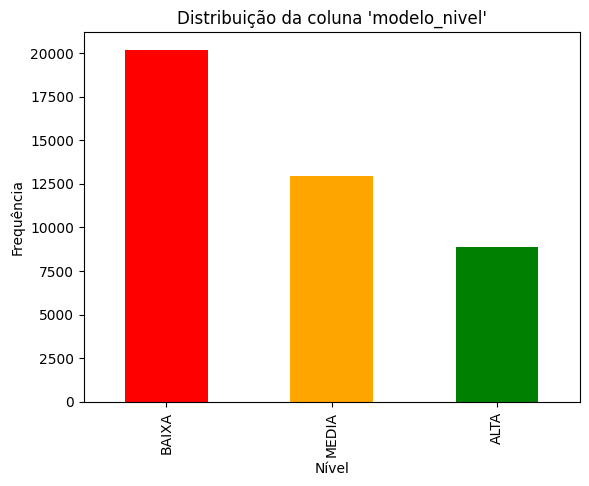

In [ ]:
# Distribuição do nosso target
dados_df["modelo_nivel"].value_counts().plot(kind="bar", color=["red", "orange", "green"])
plt.title("Distribuição da coluna 'modelo_nivel'")
plt.xlabel("Nível")
plt.ylabel("Frequência")
plt.show()

In [ ]:
# Análise das palavras-chave
todas_frases = dados_df["descricao_palavra_chave"].dropna().str.split(';').sum()

todas_frases = [f.strip() for f in todas_frases]

In [ ]:
contagem = Counter(todas_frases)

# Colocar em DataFrame para visualizar melhor

contagem_df = pd.DataFrame(contagem.items(), columns=["frase", "frequencia"]).sort_values(by="frequencia", ascending=False)

print(contagem_df)


                            frase  frequencia
651              SUSTENTABILIDADE        1385
168                      EDUCAÇÃO        1294
426            POLÍTICAS PÚBLICAS        1075
374                      INOVAÇÃO         858
150             EDUCAÇÃO INFANTIL         820
...                           ...         ...
34531         FATOR IDENTIFICADOR           1
34532    CLASSIFICAÇÃO DE FATORES           1
34533                   PAQUISTÃO           1
34534                       DOHAD           1
34535  RESTRIÇÃO PROTEICA MATERNA           1

[34595 rows x 2 columns]


In [ ]:
def extrair_palavras(valor):

    if isinstance(valor, float) and pd.isna(valor):
        return []

    if isinstance(valor, list):
        return [str(v).strip() for v in valor]

    if isinstance(valor, np.ndarray):
        return [str(v).strip() for v in valor.tolist()]

    if isinstance(valor, str):
        s = valor.strip()[1:-1]
        palavras = [p.strip(" '") for p in s.split("'") if p.strip(" '")]
        return palavras

    return []


In [ ]:
listas_palavras = dados_df["palavras_chave"].apply(extrair_palavras)

todas_palavras = [p for lista in listas_palavras for p in lista]

from collections import Counter
contagem = Counter(todas_palavras)

contagem_df = pd.DataFrame(contagem.items(), columns=["palavra", "frequencia"]).sort_values(by="frequencia", ascending=False)
print(contagem_df.head(10))
print(contagem_df.shape)


                         palavra  frequencia
7           inovação tecnológica       10773
186              inclusão social       10163
3    desenvolvimento sustentável        9018
10              sustentabilidade        8353
342           educação inclusiva        5541
566      formação de professores        5126
455             inclusão digital        4896
4               empreendedorismo        4708
229    redução das desigualdades        4505
174       tecnologia na educação        4357
(2344, 2)


### Preparação para o modelo

In [ ]:
from sentence_transformers import SentenceTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from scipy.sparse import hstack
from codecarbon import EmissionsTracker
from lightgbm import LGBMClassifier

In [ ]:
text_cols = ['nome_producao', 'descricao_resumo', 'descricao_abstract', 'tema']
for col in text_cols:
    dados_df[col] = dados_df[col].fillna('')

# Documento unificado para cada produção
# Combinamos título, resumo em português e abstract em inglês para máximo contexto
dados_df['texto_producao'] = dados_df['nome_producao'] + ' ' + dados_df['descricao_resumo'] + ' ' + dados_df['descricao_abstract']

# Documento unificado para cada tema
# Transformar palavras-chave do tema em uma string
dados_df['palavras_chave_str'] = dados_df['palavras_chave'].apply(lambda x: ' '.join(x) if isinstance(x, (list, np.ndarray)) else '')
dados_df['texto_tema'] = dados_df['tema'] + ' ' + dados_df['palavras_chave_str']

print(f"\nExemplo de 'texto_producao':\n{dados_df['texto_producao'].iloc[0]}")
print(f"\nExemplo de 'texto_tema':\n{dados_df['texto_tema'].iloc[0]}")


Exemplo de 'texto_producao':
AS TECNOLOGIAS DIGITAIS DA INFORMAÇÃO E COMUNICAÇÃO NAS CIÊNCIAS DA NATUREZA PARA O ENSINO MÉDIO A PESQUISA, DESCRITA NO PRESENTE TRABALHO, ENVOLVE DOIS ASPECTOS DA EDUCAÇÃO DE GRANDE ATUALIDADE E IMPORTÂNCIA PARA O ENSINO MÉDIO. TRATA-SE DAS TECNOLOGIAS DIGITAIS DE INFORMAÇÃO E COMUNICAÇÃO E DA BASE NACIONAL COMUM CURRICULAR. ESTES DOIS ASPECTOS ESTÃO UNIDOS, INDISSOLUVELMENTE, PELA CONCEPÇÃO DAS COMPETÊNCIAS GERAIS E DAS ÁREAS DE CONHECIMENTO E, PARTICULARMENTE, NAS COMPETÊNCIAS ESPECÍFICAS DE CIÊNCIAS DA NATUREZA E SUAS TECNOLOGIAS. A PARTIR DAÍ, NÃO SERIA POSSÍVEL CONDUZIR O ENSINO E A APRENDIZAGEM NO ENSINO MÉDIO, SEM O PRESSUPOSTO DA UTILIZAÇÃO DAS TECNOLOGIAS DE INFORMAÇÃO E COMUNICAÇÃO. SURGE ENTÃO A QUESTÃO DE COMO ISSO ACONTECE NA PRÁTICA DO PROCESSO EDUCATIVO, PRECISAMENTE NUM MUNICÍPIO PERIFÉRICO DE UM ESTADO DA REGIÃO NORTE DO BRASIL. POR INFERÊNCIA LÓGICA OU CORRELAÇÃO PODERIA SE ASSUMIR A RESPOSTA À QUESTÃO EM FUNÇÃO APENAS DO ÍNDICE DE DESE

In [ ]:
# Vetorização e Encoding

# Inicia o monitoramento para os embeddings
tracker_embeddings = EmissionsTracker(project_name="LeanDL_HPC_Challenge", experiment_name="Embedding_Generation")
tracker_embeddings.start()

# Embeddings de Texto
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Embeddings para o df
producao_embeddings = model.encode(dados_df['texto_producao'].to_list(), show_progress_bar=True)
tema_embeddings = model.encode(dados_df['texto_tema'].to_list(), show_progress_bar=True)
X = np.hstack([producao_embeddings, tema_embeddings])

# Para o monitoramento
emissions_embeddings = tracker_embeddings.stop()
print(f"\n * Pegada de Carbono da Geração de Embeddings: {emissions_embeddings * 1000:.5f} gCO2eq")

Batches:   0%|          | 0/1314 [00:00<?, ?it/s]

Batches:   0%|          | 0/1314 [00:00<?, ?it/s]


 * Pegada de Carbono da Geração de Embeddings: 2.67840 gCO2eq


In [ ]:
# Preparando o Alvo (y)
y_labels = dados_df['modelo_nivel']
le = LabelEncoder()
y = le.fit_transform(y_labels)
class_names = le.classes_

# Dividir os dados
# Usar stratify = y para garantir que a proporção das classes seja a mesma nos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y )

print(f"X_train: {X_train.shape}")
print(f"X_teste: {X_test.shape}")

X_train: (31519, 768)
X_teste: (10507, 768)


### MODELO 1: REGRESSÃO LOGÍSTICA (BASELINE)

In [ ]:
# Objeto tracker
tracker = EmissionsTracker(project_name="LeanDL_HPC", experiment_name="LogisticRegression_Training")

# Inicia o monitoramento
tracker.start()

# Treinando o modelo de Regressão Logística
clf = LogisticRegression(class_weight = 'balanced', max_iter = 1000, random_state = 42)
clf.fit(X_train, y_train)

# Para o monitoramento
emissions_kg = tracker.stop()

print(f"Pegada de Carbono do Treinamento: {emissions_kg * 1000:.5f} gCO2eq") # Convertendo para gramas

y_pred = clf.predict(X_test)

print("\n * Relatório de Classificação (Regressão Logistica)")
print(classification_report(y_test, y_pred, target_names=class_names))

Pegada de Carbono do Treinamento: 0.33014 gCO2eq

 * Relatório de Classificação (Regressão Logistica)
              precision    recall  f1-score   support

        ALTA       0.40      0.60      0.48      2223
       BAIXA       0.64      0.51      0.56      5046
       MEDIA       0.38      0.37      0.38      3238

    accuracy                           0.49     10507
   macro avg       0.47      0.49      0.47     10507
weighted avg       0.51      0.49      0.49     10507



### MODELO 2: LIGHTGBM

In [ ]:
# Objeto tracker
tracker = EmissionsTracker(project_name="LeanDL_HPC", experiment_name="LightLGBM_Training")

# Inicia o monitoramento
tracker.start()

clf_lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
clf_lgbm.fit(X_train, y_train)

# Para o monitoramento
emissions_kg = tracker.stop()

print(f"Pegada de Carbono do Treinamento: {emissions_kg * 1000:.5f} gCO2eq") # Convertendo para gramas

y_pred = clf_lgbm.predict(X_test)

print("\n * Relatório de Classificação (LightGBM)")
print(classification_report(y_test, y_pred, target_names=class_names))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.599370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 193395
[LightGBM] [Info] Number of data points in the train set: 31519, number of used features: 768
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Pegada de Carbono do Treinamento: 0.45240 gCO2eq


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 * Relatório de Classificação (LightGBM)
              precision    recall  f1-score   support

        ALTA       0.50      0.62      0.55      2223
       BAIXA       0.67      0.58      0.62      5046
       MEDIA       0.39      0.40      0.39      3238

    accuracy                           0.53     10507
   macro avg       0.52      0.53      0.52     10507
weighted avg       0.54      0.53      0.54     10507

